# Proyecto Integrador - Análisis del Data Warehouse Airbnb

Este Jupyter Notebook forma parte del **Proyecto Integrador de Ingeniería de Datos**, donde se diseñó e implementó un pipeline ELT completo en la nube utilizando:

- Python para ingestión y carga de datos
- AWS S3 como almacenamiento en capa Bronze
- MySQL en Amazon RDS como Data Warehouse
- Apache Airflow para orquestación
- SQL para transformaciones (Silver y Gold layers)
- GitHub Actions para CI/CD

El objetivo de este notebook es **consumir los datos de la capa Gold del Data Warehouse y generar insights de negocio mediante análisis exploratorio y visualizaciones.**


## Objetivos del análisis

1. Conectarse a la base de datos MySQL simulando Amazon RDS utilizando variables de entorno.
2. Consultar la capa **Gold (data mart)** generada en el pipeline ELT.
3. Responder preguntas estratégicas del negocio:
   - Zonas más rentables
   - Precio promedio por barrio
   - Tipos de alojamiento más demandados
   - Hosts con mejor desempeño
4. Visualizar los resultados con gráficos.
5. Generar conclusiones accionables para la empresa.


## Configuración del entorno

Las credenciales se almacenan en un archivo `.env` para evitar exponer información sensible.


In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv


In [ ]:
# Cargar variables de entorno
load_dotenv()

# Leer variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = int(os.getenv("DB_PORT"))
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# Conexión a MySQL
conn = mysql.connector.connect(
    host=DB_HOST,
    port=DB_PORT,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME
)

print("Conectado a MySQL correctamente")

Conectado a MySQL


##  Extracción de datos desde la capa Gold


In [24]:
query = "SELECT * FROM gold_airbnb_master"
df = pd.read_sql(query, conn)
df.head()


C:\Users\Tonys\AppData\Local\Temp\ipykernel_2360\2311635018.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,fact_id,listing_id,host_name,neighbourhood_group,neighbourhood,room_type,price_usd,price_mxn,price_ars,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review,exchange_rate_timestamp
0,1,2539,John,Brooklyn,Kensington,Private room,149.0,2626.44,212995.5,1,9,0.21,365,2018-10-19,2026-01-18 00:29:27
1,2,2595,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,3966.10,321637.5,1,45,0.38,355,2019-05-21,2026-01-18 00:29:27
2,3,3647,Elisabeth,Manhattan,Harlem,Private room,150.0,2644.07,214425.0,3,0,NaN,365,None,2026-01-18 00:29:27
3,4,3831,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1568.81,127225.5,1,270,4.64,194,2019-07-05,2026-01-18 00:29:27
4,5,5022,Laura,Manhattan,East Harlem,Entire home/apt,80.0,1410.17,114360.0,10,9,0.10,0,2018-11-19,2026-01-18 00:29:27


##  Zonas más rentables (Precio promedio por zona)


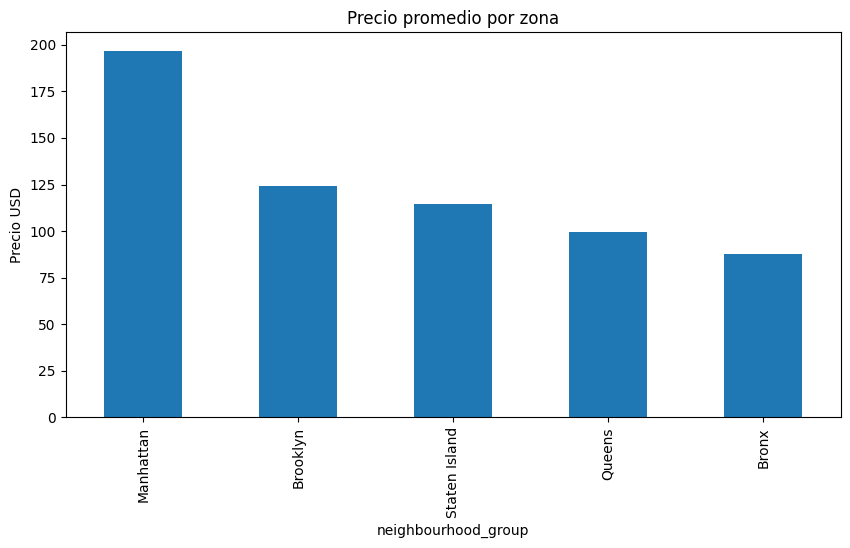

In [25]:
zone_price = df.groupby("neighbourhood_group")["price_usd"].mean().sort_values(ascending=False)

zone_price.plot(kind="bar", figsize=(10,5), title="Precio promedio por zona")
plt.ylabel("Precio USD")
plt.show()


##  Precio promedio por barrio


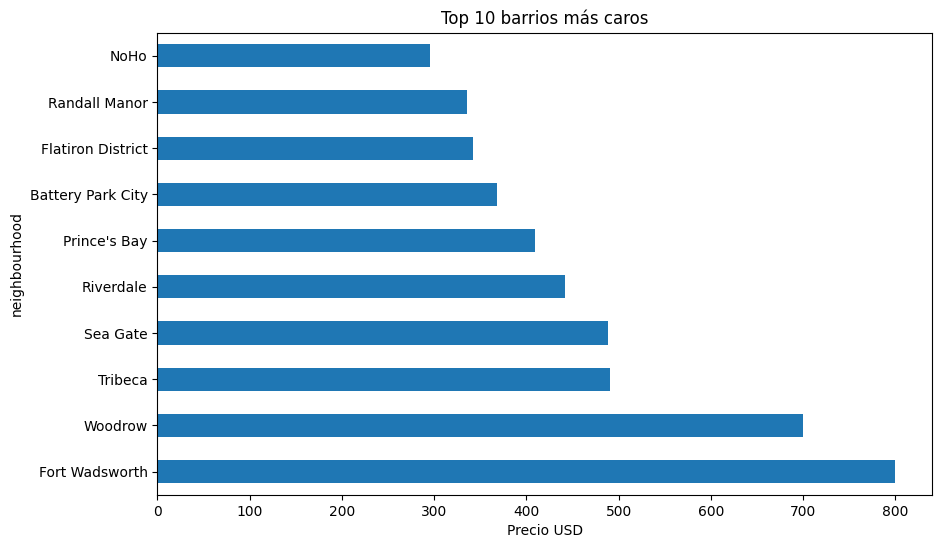

In [26]:
neigh_price = df.groupby("neighbourhood")["price_usd"].mean().sort_values(ascending=False).head(10)

neigh_price.plot(kind="barh", figsize=(10,6), title="Top 10 barrios más caros")
plt.xlabel("Precio USD")
plt.show()


##  Tipos de alojamiento más demandados


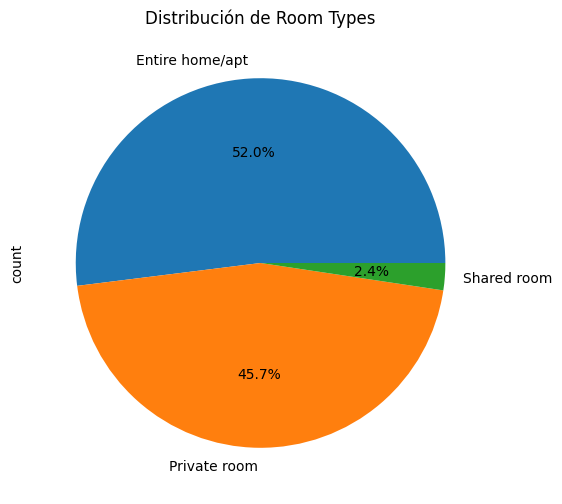

In [27]:
room_count = df["room_type"].value_counts()

room_count.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Distribución de Room Types")
plt.show()


##  Hosts con mejor desempeño


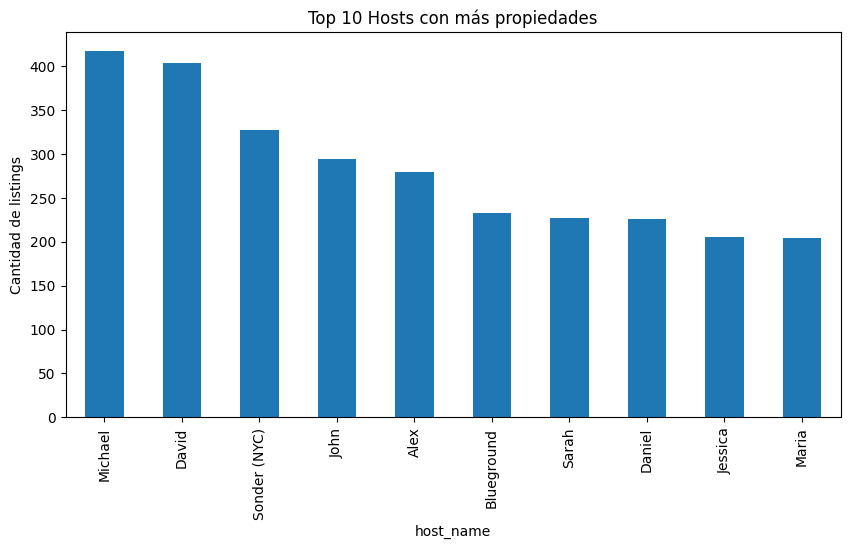

In [28]:
top_hosts = df.groupby("host_name")["listing_id"].count().sort_values(ascending=False).head(10)

top_hosts.plot(kind="bar", figsize=(10,5), title="Top 10 Hosts con más propiedades")
plt.ylabel("Cantidad de listings")
plt.show()


##  Comparación de precios en múltiples monedas


In [29]:
df[["price_usd","price_mxn","price_ars"]].describe()


,price_usd,price_mxn,price_ars
count,48884.000000,48884.000000,4.888400e+04
mean,152.755053,2692.629016,2.183633e+05
std,240.170260,4233.505212,3.433234e+05
min,10.000000,176.270000,1.429500e+04
25%,69.000000,1216.270000,9.863550e+04
50%,106.000000,1868.470000,1.515270e+05
75%,175.000000,3084.740000,2.501625e+05
max,10000.000000,176271.000000,1.429500e+07



##  Conclusiones del análisis

1. Manhattan presenta los precios promedio más altos, confirmando su alta rentabilidad.
2. Los barrios centrales concentran los listings más caros.
3. Entire home/apt es el tipo de alojamiento más demandado.
4. Un pequeño grupo de hosts concentra la mayoría de propiedades (efecto Pareto).
5. La integración de tasas de cambio permite análisis financiero multi-país.

Este pipeline demuestra una arquitectura escalable lista para análisis avanzado y machine learning.


##  Autor

Proyecto desarrollado como parte del **Proyecto Integrador de Ingeniería de Datos**.

Tecnologías utilizadas:
- Python, SQL, MySQL
- AWS S3, Amazon RDS
- Apache Airflow
- Docker
- GitHub Actions
- Jupyter Notebook
